In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

#Save this for when we need to submit data back to kaggle
test_df_ids = test_df.loc[0:,"PassengerId"]
#drop data
train_df = train_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
test_df = test_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

train_df.head(n=5)
seed = 7
np.random.seed(seed)

In [2]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train_df.count(), test_df.count()

(Survived    891
 Pclass      891
 Sex         891
 Age         714
 SibSp       891
 Parch       891
 Fare        891
 Embarked    889
 dtype: int64, Pclass      418
 Sex         418
 Age         332
 SibSp       418
 Parch       418
 Fare        417
 Embarked    418
 dtype: int64)

Lets fill the missing data with the mean value


In [4]:
missing_values = ["Age", "Fare"]
for i in missing_values:
    mean = train_df.loc[:, i].mean()
    train_df.loc[:, i].fillna(mean, inplace =True)
    test_df.loc[:, i].fillna(mean, inplace =True)
#Non int case for embarked, only 2 values missing here so we drop them
train_df = train_df.dropna(axis = 'index')
    
#train_df.loc[:, "Age"].fillna(train_df.loc[:,"Age"].mean(), inplace =True)


#Scikit method. Will not implement atm.
#ageimp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 1)
#x_train[:, [3,7]] = imp.transform(x_train[:,[3,7]])
#x_train[:, [3,7]] = imp.transform(x_train[:,[3,7]])
#Only works on seperate columns
#imp = imp.fit(x_train[:,[3,7]])
#x_train[:, [3,7]] = imp.transform(x_train[:,[3,7]])
#x_train[:,3] = np.asarray(imp.fit_transform(np.asmatrix(x_train[:,7])))

Confirm the imputation succeeded

In [5]:
train_df["Age"].head(n=6)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
Name: Age, dtype: float64

In [6]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.154603,0.447368,0.392344,35.619000
std,0.841838,12.636666,0.896760,0.981429,55.840751
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


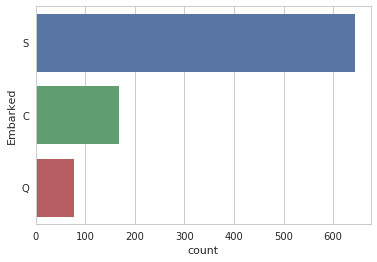

In [8]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.countplot(y="Embarked" , data = train_df)

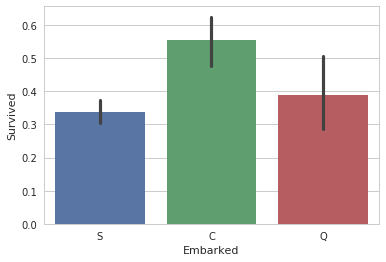

In [9]:
sns.barplot(x="Embarked", y = "Survived", data = train_df)

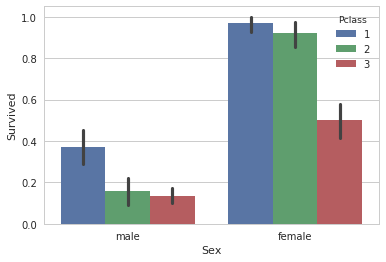

In [10]:
sns.barplot(x="Sex", y= "Survived", hue="Pclass", data = train_df)

All the missing data has been filled. Whats left now is to encode categorical values and feature scaling.
Lets start with encoding.

In [11]:
train_df = pd.get_dummies(train_df, columns = ["Sex", "Pclass","Embarked"])
test_df = pd.get_dummies(test_df, columns = ["Sex", "Pclass","Embarked"])
train_df.head(n=5)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [12]:
train_df.count()

Survived      889
Age           889
SibSp         889
Parch         889
Fare          889
Sex_female    889
Sex_male      889
Pclass_1      889
Pclass_2      889
Pclass_3      889
Embarked_C    889
Embarked_Q    889
Embarked_S    889
dtype: int64

The dataset is now complete. On to feature scaling and data splitting.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train, validate = train_test_split(train_df, test_size = 0.25, random_state = seed)
x_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
x_val = validate.iloc[:,1:]
y_val = validate.iloc[:,0]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(test_df)

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters_test1 = [{'C': [1, 10, 100, 1000, 2000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grsearch1 = GridSearchCV(SVC(),
                        param_grid = parameters_test1, scoring = 'roc_auc', cv = 3, n_jobs = 4, return_train_score = True )
grsearch1 = grsearch1.fit(x_train, y_train)
pd.DataFrame(grsearch1.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.016191,0.003778,0.827295,0.837406,1,NaN,linear,"{'C': 1, 'kernel': 'linear'}",3,0.832729,0.830389,0.843556,0.834282,0.805599,0.847546,0.011893,0.002044,0.015965,0.007344
1,0.062644,0.001934,0.827611,0.836586,10,NaN,linear,"{'C': 10, 'kernel': 'linear'}",2,0.832729,0.830389,0.843728,0.833506,0.806375,0.845864,0.011431,0.000442,0.015673,0.006682
2,0.445784,0.001474,0.826547,0.838010,100,NaN,linear,"{'C': 100, 'kernel': 'linear'}",4,0.833247,0.830497,0.843470,0.833678,0.802924,0.849853,0.201217,0.000082,0.017217,0.008475
3,8.343732,0.001510,0.828790,0.836299,1000,NaN,linear,"{'C': 1000, 'kernel': 'linear'}",1,0.832729,0.830346,0.843125,0.833657,0.810516,0.844893,2.609452,0.000165,0.013601,0.006226
4,0.007156,0.002764,0.825052,0.890927,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",5,0.809265,0.883702,0.845195,0.885028,0.820695,0.904050,0.000577,0.000223,0.014988,0.009295
5,0.007083,0.003201,0.819042,0.896822,1,0.2,rbf,"{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}",6,0.806073,0.893278,0.851924,0.891391,0.799129,0.905797,0.000406,0.000598,0.023423,0.006393
6,0.009083,0.002935,0.816425,0.901049,1,0.3,rbf,"{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}",7,0.818927,0.896534,0.840278,0.894065,0.790071,0.912547,0.001738,0.000062,0.020573,0.008193
7,0.007714,0.003622,0.814642,0.904650,1,0.4,rbf,"{'C': 1, 'gamma': 0.4, 'kernel': 'rbf'}",8,0.821342,0.896340,0.833549,0.899349,0.789036,0.918263,0.000197,0.001009,0.018780,0.009703
8,0.007765,0.002985,0.810617,0.905319,1,0.5,rbf,"{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}",9,0.821860,0.894421,0.824836,0.902821,0.785154,0.918715,0.000144,0.000064,0.018046,0.010074
9,0.011355,0.006536,0.806792,0.909151,1,0.6,rbf,"{'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}",10,0.823154,0.900287,0.818797,0.904978,0.778425,0.922188,0.005036,0.004651,0.020137,0.009415


In [15]:
grsearch1.best_score_, grsearch1.best_params_

(0.8287899700943181, {'C': 1000, 'kernel': 'linear'})

In [16]:
clf = SVC(kernel = 'rbf', gamma = 0.2, C = 1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
cm

array([[123,  12],
       [ 30,  58]])

In [18]:
1-(cm[0,1] + cm[1,0])/(cm[0,0]+cm[1,1])

0.76795580110497241

It seems we have about 76% accuracy on our test set with the current model.
Time to make the real predictions and see what that gives us.

In [19]:
predictions = clf.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [20]:

inputdf = pd.read_csv("test.csv")
data_to_submit = pd.DataFrame({
    'PassengerId':inputdf.iloc[:,0],
    'Survived':predictions
})
data_to_submit.to_csv("svm_results.csv", index=False)

results on kaggle are now at 77,9% accuracy

The grid search made above is quite heavy. What results would svm achieve when using default parameters?

In [21]:
clf = SVC(kernel = 'rbf')
clf.fit(x_train, y_train)
val_predictions = clf.predict(x_val)
cm = confusion_matrix(val_predictions, y_val)
cm

array([[131,  33],
       [  4,  55]])

In [22]:
1-(cm[0,1] + cm[1,0])/(cm[0,0]+cm[1,1])

0.80107526881720426

With the default parameters it seems we achieve 74% accuracy on our test set.

Lets look a bit closer at our optimizations and see if there is more that can be done.

In [23]:
parameters_test2 = {'C': [0.5, 0.8, 0.9, 1, 1.1, 1.2, 1.5, 2], 'kernel': ['rbf'], 'gamma': [0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.9]}
grsearch2 = GridSearchCV(SVC(random_state = 7),
                        param_grid = parameters_test2, scoring = 'roc_auc', cv = 3, n_jobs = 4, return_train_score = True )
grsearch2 = grsearch2.fit(x_train, y_train)
pd.DataFrame(grsearch2.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.008707,0.010396,0.834857,0.881984,0.5,0.1,rbf,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}",1,0.825569,0.881308,0.859256,0.865640,0.819746,0.899004,0.000577,0.009706,0.017416,0.013629
1,0.016850,0.010322,0.824045,0.879813,0.5,0.15,rbf,"{'C': 0.5, 'gamma': 0.15, 'kernel': 'rbf'}",13,0.824275,0.877146,0.849853,0.865985,0.798007,0.896308,0.011086,0.009175,0.021167,0.012522
2,0.008659,0.003135,0.820221,0.881625,0.5,0.2,rbf,"{'C': 0.5, 'gamma': 0.2, 'kernel': 'rbf'}",19,0.819272,0.884220,0.850285,0.868810,0.791106,0.891844,0.001438,0.000148,0.024169,0.009581
3,0.007175,0.003080,0.820853,0.883285,0.5,0.25,rbf,"{'C': 0.5, 'gamma': 0.25, 'kernel': 'rbf'}",18,0.820997,0.886765,0.846920,0.870708,0.794643,0.892383,0.000259,0.000023,0.021342,0.009184
4,0.007286,0.003204,0.819387,0.886635,0.5,0.3,rbf,"{'C': 0.5, 'gamma': 0.3, 'kernel': 'rbf'}",20,0.825138,0.888490,0.842262,0.875388,0.790761,0.896027,0.000192,0.000202,0.021415,0.008527
5,0.007874,0.003295,0.811911,0.886146,0.5,0.5,rbf,"{'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'}",41,0.814872,0.874989,0.836568,0.879400,0.784291,0.904050,0.000691,0.000206,0.021445,0.012787
6,0.008675,0.003633,0.808172,0.898540,0.5,0.9,rbf,"{'C': 0.5, 'gamma': 0.9, 'kernel': 'rbf'}",47,0.821256,0.889892,0.826475,0.888048,0.776786,0.917680,0.000272,0.000353,0.022296,0.013555
7,0.006802,0.002989,0.832758,0.886750,0.8,0.1,rbf,"{'C': 0.8, 'gamma': 0.1, 'kernel': 'rbf'}",2,0.818064,0.880877,0.857186,0.876855,0.823024,0.902519,0.000604,0.000098,0.017391,0.011270
8,0.007211,0.002740,0.826892,0.889683,0.8,0.15,rbf,"{'C': 0.8, 'gamma': 0.15, 'kernel': 'rbf'}",6,0.819617,0.883335,0.851665,0.881470,0.809394,0.904244,0.000417,0.000055,0.018007,0.010324
9,0.006842,0.002892,0.823039,0.892207,0.8,0.2,rbf,"{'C': 0.8, 'gamma': 0.2, 'kernel': 'rbf'}",16,0.821170,0.890409,0.849077,0.885956,0.798870,0.900254,0.000373,0.000111,0.020540,0.005974


In [24]:
grsearch2.best_score_, grsearch2.best_params_

(0.83485737290085116, {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'})

In [25]:
parameters_test2 = {'C': [0.2, 0.3, 0.5, 0.8, 0.9, 1, 1.1, 1.2, 1.5, 2], 'kernel': ['rbf'], 'gamma': [0.01, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.9]}
grsearch2 = GridSearchCV(SVC(random_state = 7),
                        param_grid = parameters_test2, scoring = 'roc_auc', cv = 3, n_jobs = 4, return_train_score = True )
grsearch2 = grsearch2.fit(x_train, y_train)
pd.DataFrame(grsearch2.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.028888,0.008419,0.840177,0.849289,0.2,0.01,rbf,"{'C': 0.2, 'gamma': 0.01, 'kernel': 'rbf'}",2,0.852226,0.843825,0.852183,0.840623,0.816123,0.863419,0.006495,0.004593,0.017009,0.010076
1,0.014229,0.005160,0.838423,0.855428,0.2,0.05,rbf,"{'C': 0.2, 'gamma': 0.05, 'kernel': 'rbf'}",12,0.834714,0.859849,0.863138,0.835188,0.817417,0.871247,0.008737,0.001222,0.018849,0.015049
2,0.010346,0.003132,0.839516,0.861503,0.2,0.08,rbf,"{'C': 0.2, 'gamma': 0.08, 'kernel': 'rbf'}",7,0.838423,0.868735,0.861154,0.837711,0.818970,0.878062,0.003121,0.000161,0.017239,0.017249
3,0.007042,0.003196,0.837819,0.863013,0.2,0.1,rbf,"{'C': 0.2, 'gamma': 0.1, 'kernel': 'rbf'}",13,0.834023,0.868239,0.862276,0.840472,0.817158,0.880327,0.000152,0.000077,0.018614,0.016685
4,0.007723,0.003285,0.832960,0.864443,0.2,0.15,rbf,"{'C': 0.2, 'gamma': 0.15, 'kernel': 'rbf'}",30,0.831263,0.869770,0.860723,0.844268,0.806893,0.879292,0.000366,0.000165,0.022009,0.014786
5,0.013057,0.003245,0.826633,0.866363,0.2,0.2,rbf,"{'C': 0.2, 'gamma': 0.2, 'kernel': 'rbf'}",38,0.825914,0.870590,0.857962,0.846058,0.796023,0.882440,0.004458,0.000013,0.025292,0.015151
6,0.007674,0.003387,0.824620,0.867261,0.2,0.25,rbf,"{'C': 0.2, 'gamma': 0.25, 'kernel': 'rbf'}",43,0.821429,0.871862,0.858135,0.847761,0.794298,0.882160,0.000331,0.000095,0.026159,0.014415
7,0.008228,0.003993,0.820048,0.868153,0.2,0.3,rbf,"{'C': 0.2, 'gamma': 0.3, 'kernel': 'rbf'}",57,0.816253,0.876844,0.855978,0.843836,0.787914,0.883778,0.000546,0.000697,0.027916,0.017426
8,0.008177,0.003579,0.817144,0.872121,0.2,0.5,rbf,"{'C': 0.2, 'gamma': 0.5, 'kernel': 'rbf'}",68,0.817547,0.875550,0.848646,0.852269,0.785240,0.888544,0.000331,0.000118,0.025887,0.015006
9,0.009369,0.003859,0.811307,0.882458,0.2,0.9,rbf,"{'C': 0.2, 'gamma': 0.9, 'kernel': 'rbf'}",86,0.816339,0.875507,0.838121,0.869975,0.779460,0.901894,0.000439,0.000037,0.024211,0.013927


In [26]:
grsearch2.best_score_, grsearch2.best_params_

(0.84049344375431334, {'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'})

In [29]:
parameters_test2 = {'C': [0.3, 0.5, 0.8, 1], 'kernel': ['rbf'], 'gamma': [0.001, 0.005, 0.008, 0.01, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5]}
grsearch2 = GridSearchCV(SVC(random_state = 7),
                        param_grid = parameters_test2, scoring = 'roc_auc', cv = 3, n_jobs = 4, return_train_score = True )
grsearch2 = grsearch2.fit(x_train, y_train)
pd.DataFrame(grsearch2.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.012308,0.011613,0.836468,0.845407,0.3,0.001,rbf,"{'C': 0.3, 'gamma': 0.001, 'kernel': 'rbf'}",21,0.851622,0.839059,0.839243,0.840235,0.818539,0.856927,0.001275,0.008904,0.013648,0.008160
1,0.010613,0.006520,0.840148,0.849196,0.3,0.005,rbf,"{'C': 0.3, 'gamma': 0.005, 'kernel': 'rbf'}",7,0.854382,0.844235,0.848473,0.842283,0.817590,0.861068,0.002681,0.004389,0.016133,0.008433
2,0.008475,0.005107,0.840033,0.849778,0.3,0.008,rbf,"{'C': 0.3, 'gamma': 0.008, 'kernel': 'rbf'}",8,0.851277,0.844386,0.850457,0.842542,0.818366,0.862405,0.001142,0.002568,0.015325,0.008960
3,0.006996,0.003346,0.839056,0.849648,0.3,0.01,rbf,"{'C': 0.3, 'gamma': 0.01, 'kernel': 'rbf'}",14,0.848602,0.845400,0.852269,0.841291,0.816296,0.862254,0.000238,0.000140,0.016163,0.009070
4,0.006661,0.002836,0.834915,0.860770,0.3,0.05,rbf,"{'C': 0.3, 'gamma': 0.05, 'kernel': 'rbf'}",24,0.831090,0.866125,0.858998,0.839372,0.814657,0.876812,0.000217,0.000051,0.018303,0.015747
5,0.007445,0.003252,0.839947,0.867391,0.3,0.08,rbf,"{'C': 0.3, 'gamma': 0.08, 'kernel': 'rbf'}",10,0.838596,0.872660,0.861672,0.843815,0.819574,0.885697,0.000246,0.000260,0.017213,0.017500
6,0.007624,0.004848,0.836036,0.871805,0.3,0.1,rbf,"{'C': 0.3, 'gamma': 0.1, 'kernel': 'rbf'}",23,0.833851,0.872444,0.858825,0.854059,0.815433,0.888910,0.001228,0.002425,0.017782,0.014235
7,0.007416,0.003235,0.824218,0.871661,0.3,0.15,rbf,"{'C': 0.3, 'gamma': 0.15, 'kernel': 'rbf'}",30,0.818582,0.874105,0.855202,0.852463,0.798870,0.888414,0.000343,0.000203,0.023340,0.014779
8,0.008092,0.003488,0.820135,0.872495,0.3,0.2,rbf,"{'C': 0.3, 'gamma': 0.2, 'kernel': 'rbf'}",36,0.817288,0.875744,0.850889,0.854145,0.792227,0.887595,0.000490,0.000270,0.024033,0.013848
9,0.007355,0.003619,0.819387,0.872696,0.3,0.25,rbf,"{'C': 0.3, 'gamma': 0.25, 'kernel': 'rbf'}",37,0.818237,0.876434,0.849940,0.855741,0.789984,0.885913,0.000311,0.000509,0.024490,0.012598


In [30]:
grsearch2.best_score_, grsearch2.best_params_

(0.84190246146767878, {'C': 1, 'gamma': 0.008, 'kernel': 'rbf'})

In [35]:
clf = SVC(kernel = 'rbf', C = 1, gamma = 0.008)
clf.fit(x_train, y_train)
val_predictions = clf.predict(x_val)
cm = confusion_matrix(val_predictions, y_val)
cm

array([[120,  22],
       [ 15,  66]])

In [33]:
1-(cm[0,1] + cm[1,0])/(cm[0,0]+cm[1,1])

0.80107526881720426

Examining the test results it seems we have slighthly balanced the number of false positives and negatives (decreased variance) but increased the bias.
We did get a slight increase in AUC. Lets see what result we get on kaggle.

In [34]:
predictions = clf.predict(x_test)
inputdf = pd.read_csv("test.csv")
data_to_submit = pd.DataFrame({
    'PassengerId':inputdf.iloc[:,0],
    'Survived':predictions
})
data_to_submit.to_csv("svm_results.csv", index=False)

Ahd the result is still 77,03% 